# BigmartSales


#### Assumptions
* Based on how much fat present in product, people purchase that item.So assumption is Low fat product sales most.
* Item which is mostly useful sales most.
* Item which have low cost, people usually buyes most and in large number.
* Old the outlet more the customer, so sales also becomes high.
* Sales also depends on location of outlet. If outlet is in city then more customers compare to outlet in rural area.
* Bigger the outlet size, bigger the sales.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler

## Data

In [2]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/BigmartSales/train.csv')
test = pd.read_csv('drive/My Drive/Colab Notebooks/BigmartSales/test.csv')

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.set_index(['Item_Identifier','Outlet_Identifier'],inplace=True)

item_identifier = test['Item_Identifier']
outlet_identifier = test['Outlet_Identifier']

test.set_index(['Item_Identifier','Outlet_Identifier'],inplace=True)

In [5]:
train.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### Handing Nan Values

In [6]:
train.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isna().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
train['Item_Weight'].dtypes

dtype('float64')

We can't simply put 0 in Nan values as weight cant be zero. We can impute mean value of all the weights

In [9]:
mean = train.Item_Weight.mean()
train['Item_Weight'] = train['Item_Weight'].fillna(mean)
test['Item_Weight'] = test['Item_Weight'].fillna(mean)

In [10]:
print(train.Outlet_Size.value_counts())
print(train.Outlet_Size.unique())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
['Medium' nan 'High' 'Small']


In outlet size case, we cant simply put mode of the column as a nan value. Each size is important in predicting purchase. So we create another variable as 'Local' so we dont need to remove any nan values.

In [11]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('Local')
test['Outlet_Size'] = test['Outlet_Size'].fillna('Local')

In [ ]:
train['Outlet_Size'].value_counts()

Medium    2793
Local     2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64


* Before visualization we need to handle Fat content column

In [12]:
replace = {'low fat':'Low Fat',
           'LF':'Low Fat',
           'reg':'Regular'}

train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace=replace)
test.Item_Fat_Content = test.Item_Fat_Content.replace(to_replace=replace)

In [14]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [13]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Visualization

In [15]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

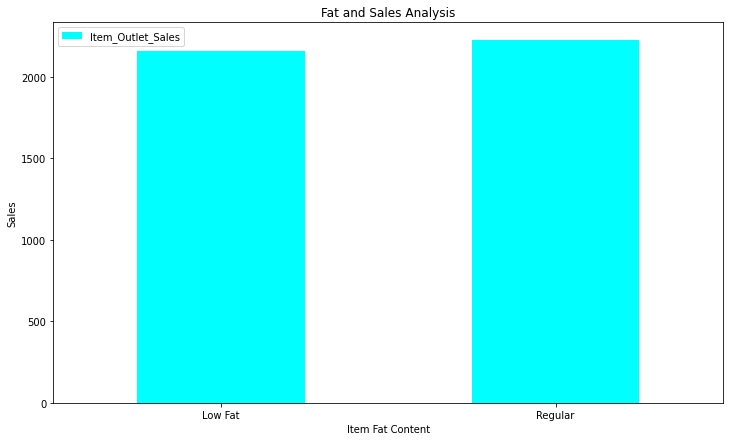

In [ ]:
Fatcontent = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.mean)

Fatcontent.plot(kind='bar', color='cyan',figsize=(12,7))
plt.xlabel("Item Fat Content")
plt.ylabel("Sales")
plt.title("Fat and Sales Analysis")
plt.xticks(rotation=0)
plt.show()

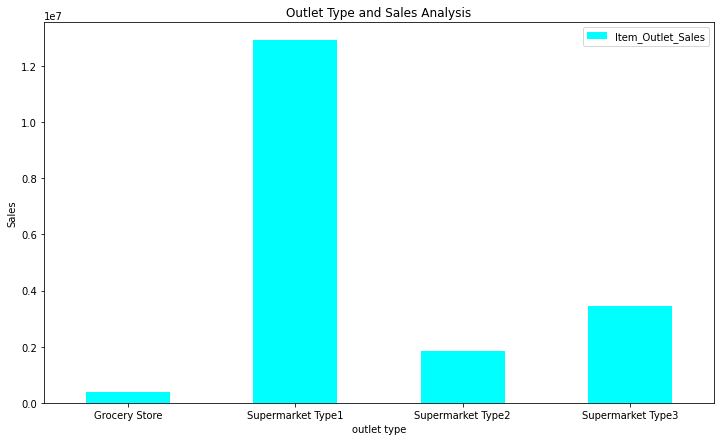

In [ ]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.sum)

Outlet_Type_pivot .plot(kind='bar', color='cyan',figsize=(12,7))
plt.xlabel("outlet type")
plt.ylabel("Sales")
plt.title("Outlet Type and Sales Analysis")
plt.xticks(rotation=0)
plt.show()

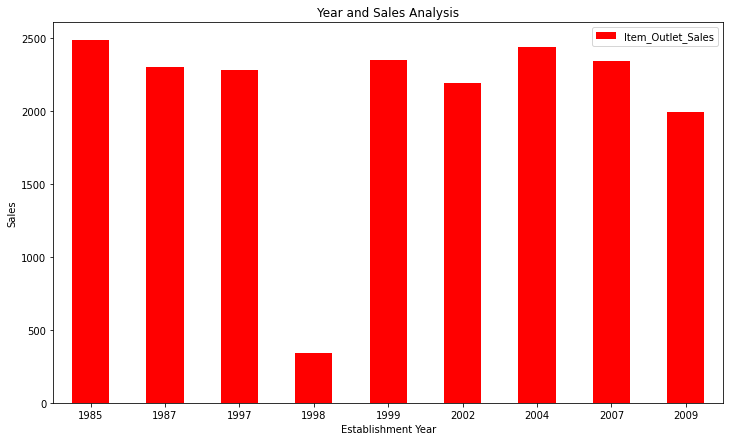

In [ ]:
EY = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.mean)

EY.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Establishment Year")
plt.ylabel("Sales")
plt.title("Year and Sales Analysis")
plt.xticks(rotation=0)
plt.show()

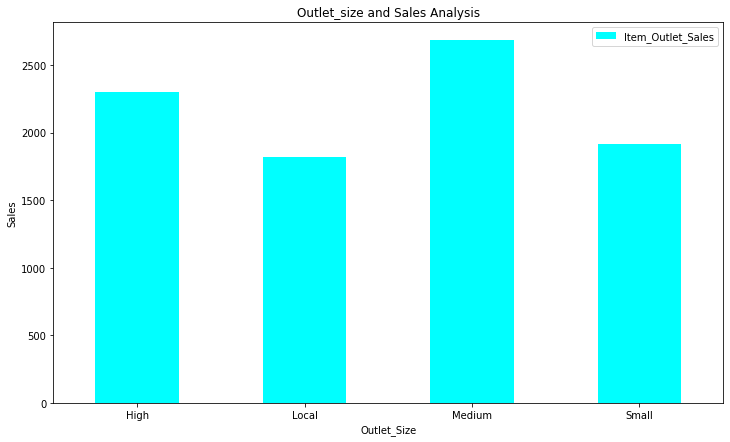

In [ ]:
Size = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.mean)

Size.plot(kind='bar', color='cyan',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Sales")
plt.title("Outlet_size and Sales Analysis")
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

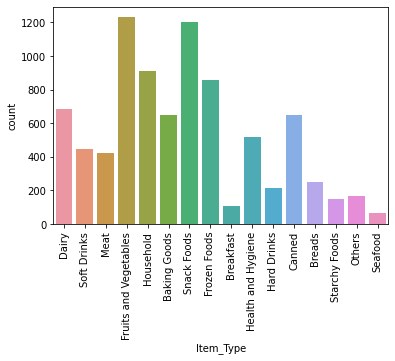

In [ ]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

### **EDA**

In [ ]:
mean = np.mean(train['Item_Weight'])
std = np.std(train['Item_Weight'])
print(mean,std)

12.857645184136409 4.225875792602069


In [ ]:
train['Item_Weight'] = (train['Item_Weight'] - mean) / std
test['Item_Weight'] = (test['Item_Weight'] -  mean)/ std

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [ ]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
lst = list(train.Item_Type.unique())
lst

['Dairy',
 'Soft Drinks',
 'Meat',
 'Fruits and Vegetables',
 'Household',
 'Baking Goods',
 'Snack Foods',
 'Frozen Foods',
 'Breakfast',
 'Health and Hygiene',
 'Hard Drinks',
 'Canned',
 'Breads',
 'Starchy Foods',
 'Others',
 'Seafood']

In [ ]:
replace = {lst[0]:0, lst[1]:1, lst[2]:2, lst[3]:3, lst[4]:4, lst[5]:5, 
           lst[6]:6, lst[7]:7, lst[8]:8, lst[9]:9, lst[10]:10, lst[11]:11,
           lst[12]:12,lst[13]:13,lst[14]:14, lst[15]:15}

train['Item_Type'] = train['Item_Type'].replace(to_replace=replace)
test['Item_Type'] = test['Item_Type'].replace(to_replace=replace)

In [ ]:
train['Outlet_Establishment_Year'].unique()

In [ ]:
le_yr = LabelEncoder()
train['Outlet_Establishment_Year'] = le_yr.fit_transform(train['Outlet_Establishment_Year'])
test['Outlet_Establishment_Year'] = le_yr.transform(test['Outlet_Establishment_Year'])

In [ ]:
replace = {'Local':0,
           'Small':1,
           'Medium':2,
           'High':3}

train['Outlet_Size'] = train['Outlet_Size'].replace(to_replace=replace)
test['Outlet_Size'] = test['Outlet_Size'].replace(to_replace=replace)

In [ ]:
replace = {'Tier 1': 0,
           'Tier 2': 1,
           'Tier 3': 2}
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].replace(to_replace=replace)
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].replace(to_replace=replace)

In [ ]:
le_ot = LabelEncoder()
train['Outlet_Type'] = le_ot.fit_transform(train['Outlet_Type'])
test['Outlet_Type'] = le_ot.transform(test['Outlet_Type'])

### Model Building

##### Train Test Split

In [ ]:
X = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model 1

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True)
lasso.fit(X_train,y_train)
y_preds = lasso.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
print(f'RMSE:{rmse}')

RMSE:1345220.3770319868


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_preds = ridge.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
print(f'RMSE:{rmse}')

RMSE:1306341.9567505885


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=145,min_samples_split=4)
dt.fit(X_train,y_train)
y_preds = dt.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1069356.1839561106

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, min_samples_leaf=100)
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1038085.4197439635

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.05)
xgb.fit(X_train,y_train)
y_preds = xgb.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

[18:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1160436.5236103623

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 15,
          'min_samples_split': 10,
          'learning_rate': 0.01,
          'loss': 'ls'}

xgb = GradientBoostingRegressor(**params)
xgb.fit(X_train,y_train)
y_preds=xgb.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1327602.4300602635

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(n_estimators=100,random_state=786)
reg.fit(X_train,y_train)
y_preds = reg.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1286236.637943757

In [ ]:
submission = pd.read_csv('drive/My Drive/Colab Notebooks/BigmartSales/sample_submission.csv')

In [ ]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [ ]:
result = rf.predict(test)

submission['Item_Identifier'] = item_identifier
submission['Outlet_Identifier'] = outlet_identifier
submission['Item_Outlet_Sales'] = result

submission.to_csv('submisson11.csv',index=False)

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,-0.029771,0.024756,-0.007489,0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.038825,0.006063,0.002447,0.001365,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.015682,-0.001315,-0.082927,-0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.029771,-0.038825,-0.015682,1.000000,-0.028493,0.010864,-0.005333,-0.000052,0.006683,-0.007849
Item_MRP,0.024756,0.006063,-0.001315,-0.028493,1.000000,0.004162,0.002473,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.007489,0.002447,-0.082927,0.010864,0.004162,1.000000,-0.360690,0.042005,-0.040040,-0.025525
Outlet_Size,0.015096,0.001365,-0.087796,-0.005333,0.002473,-0.360690,1.000000,0.290216,0.432062,0.172477
Outlet_Location_Type,0.004088,-0.001598,-0.028099,-0.000052,0.000232,0.042005,0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.006683,-0.001975,-0.040040,0.432062,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,-0.007849,0.567574,-0.025525,0.172477,0.089367,0.401522,1.000000


In [ ]:
X_train.shape

(6818, 6)

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel='linear',C=50)
svm.fit(X_train,y_train)
y_preds = svm.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1330038.9300085257

# Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.ensemble import StackingRegressor

level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
level1 = LinearRegression()

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1347079.599833213

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_preds = knn.predict(X_test)
rmse = mean_squared_error(y_test,y_preds)
rmse

1553190.5128534038